# Accelerated One Bit Linear Regression
## Import necessary modules

In [1]:
from qiskit import Aer, execute, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_state_qsphere,plot_histogram, plot_bloch_multivector, plot_state_city
import numpy as np

## Prepare Data

In [2]:
#y=a*x where a=1
x_train=np.array((0,1))
y_train=np.array((0,1))

In [3]:
def in_(x):
    if x==0:
        return np.array((1,0))
    elif x==1:
        return np.array((0,1))       
    else:
        raise ValueError("Argument must be 0 or 1")

## Make Circuit
In this part we created the manifold of the linear function

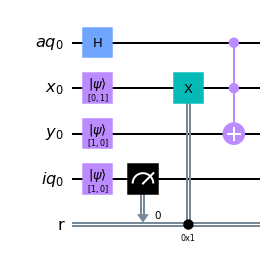

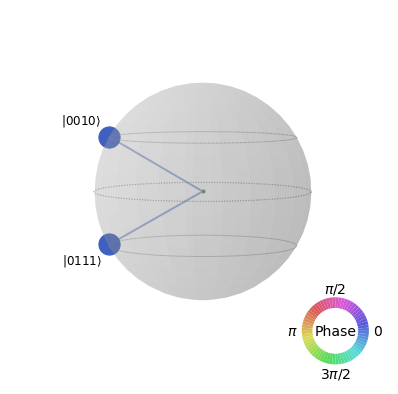

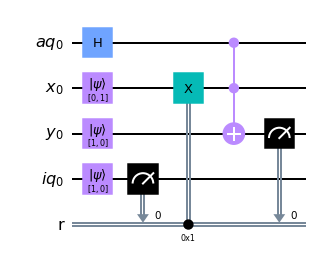

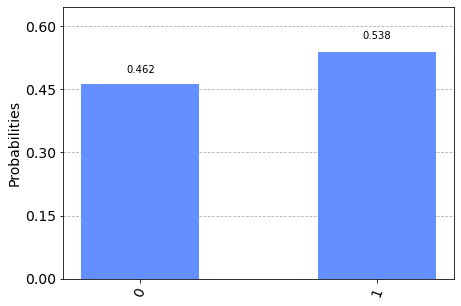

In [4]:
x=QuantumRegister(1,name="x")
iq=QuantumRegister(1,name="iq")
aq=QuantumRegister(1,name="aq")
r=ClassicalRegister(1,name="r")
y=QuantumRegister(1,name="y")
qc=QuantumCircuit(aq,x,y,iq,r)
qc.h(0)

qc.initialize((0,1),1)
qc.initialize((1,0),2)


qc.initialize((1,0),3)

qc.measure(3,0)

qc.x(1).c_if(r,1)
qc.ccx(0,1,2)

display(qc.draw("mpl"))

be=Aer.get_backend("statevector_simulator")
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))

qc.measure(2,0)
display(qc.draw("mpl"))

be=Aer.get_backend("qasm_simulator")
display(plot_histogram(execute(qc,be).result().get_counts()))

## Integrating Loss Function
### You can see all possible states in Qsphere

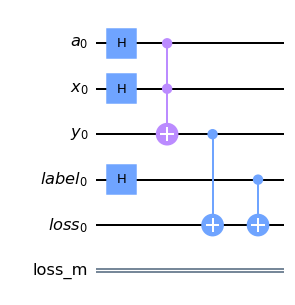

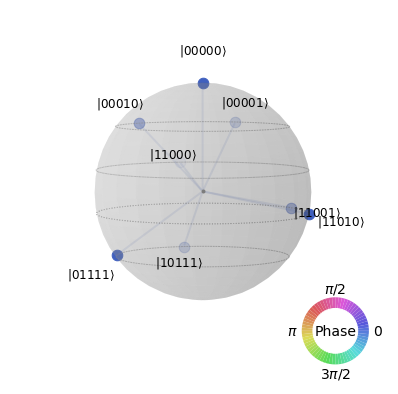

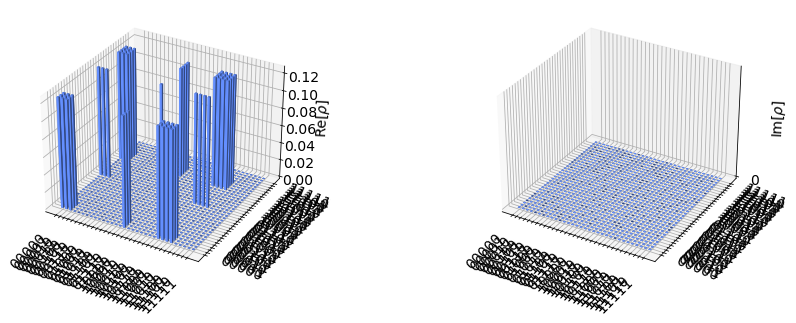

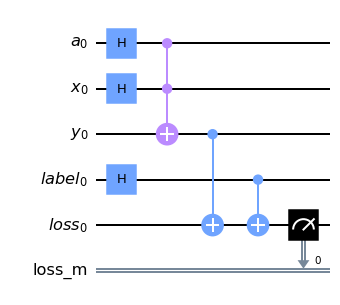

In [5]:
x=QuantumRegister(1,name="x")
a=QuantumRegister(1,name="a")
loss=ClassicalRegister(1,name="loss_m")
y=QuantumRegister(1,name="y")
la=QuantumRegister(1,name="label")
l2=QuantumRegister(1,name="loss")

qc=QuantumCircuit(a,x,y,la,l2,loss)

qc.h(0)
qc.h(1)
qc.h(3)
qc.ccx(0,1,2)

qc.cx(2,4)
qc.cx(3,4)
display(qc.draw("mpl"))

be=Aer.get_backend("statevector_simulator")
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))
display(plot_state_city(execute(qc,be).result().get_statevector()))
qc.measure(4,0)
display(qc.draw("mpl"))

### In the Qsphere, the leftmost elemant of state is value of the loss. If the leftmost element is 0, the line is in optimized state

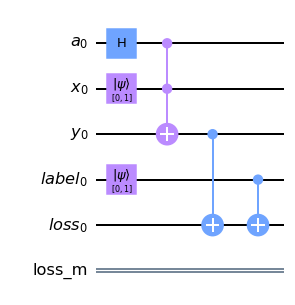

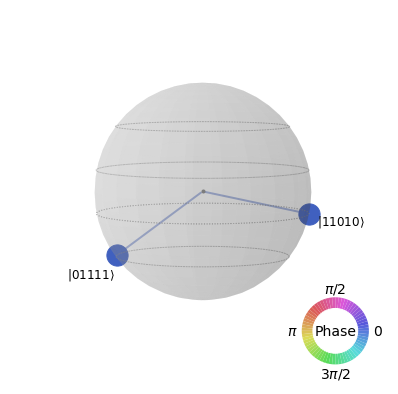

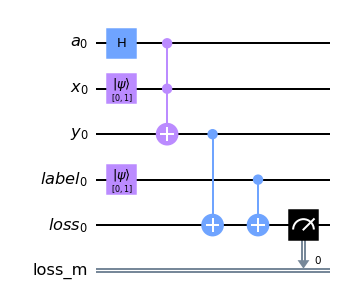

In [10]:
x=QuantumRegister(1,name="x")
a=QuantumRegister(1,name="a")
loss=ClassicalRegister(1,name="loss_m")
y=QuantumRegister(1,name="y")
la=QuantumRegister(1,name="label")
l2=QuantumRegister(1,name="loss")

qc=QuantumCircuit(a,x,y,la,l2,loss)
qc.h(0)
qc.initialize((0,1),1)
qc.initialize((0,1),3)

qc.ccx(0,1,2)

qc.cx(2,4)
qc.cx(3,4)
display(qc.draw("mpl"))

be=Aer.get_backend("statevector_simulator")
display(plot_state_qsphere(execute(qc,be).result().get_statevector()))
qc.measure(4,0)
display(qc.draw("mpl"))